# Show any parameter

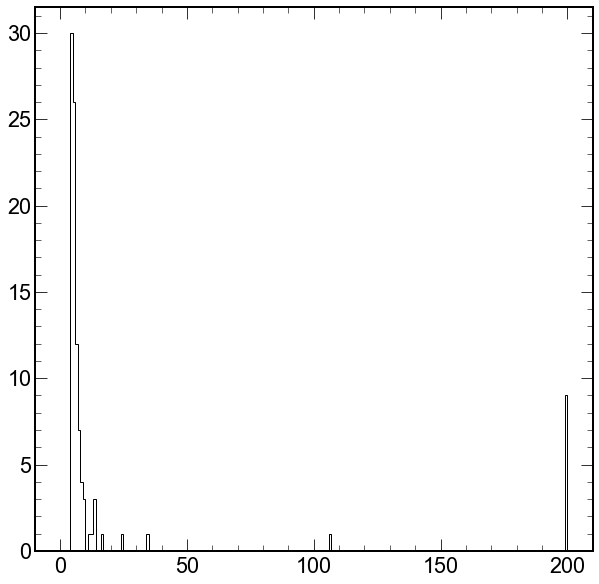

In [1]:
import modules.data.info.ShowParam
# from importlib import reload
#reload(modules.info.ShowParam)
modules.data.info.ShowParam.ShowParamHist('nTracks', 200, (0,200))


## cache size vs chunks len 


## Data validation

### Duplicates

Cause of some reasons AliESD could contains the same track few times.
All of these tracks will marked as ITS SA, since in grid I have condition to throw such tracks it is not a problem anymore. 
But let's leave this checks

![img](https://sun9-69.userapi.com/c855620/v855620379/242fba/B1cMRF7RoH0.jpg)

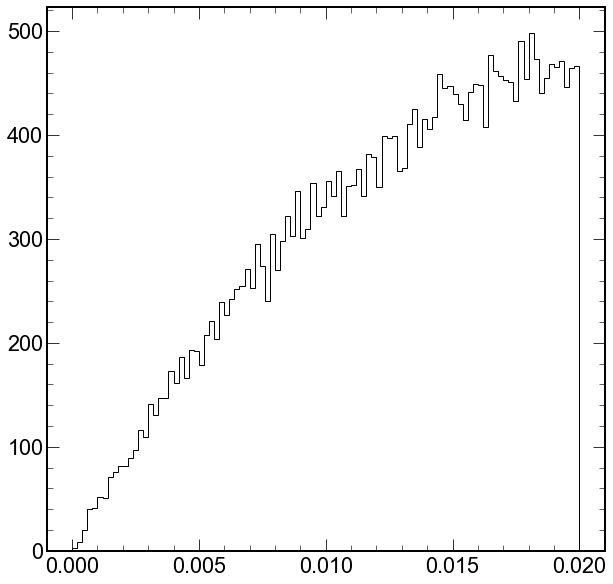

In [1]:
from modules.data.validation.duplicates import ShowDifferencesFor3Params, ShowDifferencesFor2Params

# reload(modules.validation.duplicates)

# ShowDifferencesFor3Params('T_Px', 'T_Py', 'T_Pz')
ShowDifferencesFor2Params('T_Dca0', 'T_Dca1')


